## Preliminary EDA 

- Using preliminary partial data

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# read in the csv from process_data folder
mice = pd.read_csv("../process_data/aggregate_results_new.csv")


In [26]:
mice.head()

,Unnamed: 0,frac_in_arms_frac_in_closedAndMiddle,frac_in_arms_frac_in_closedArms,frac_in_arms_frac_in_middle,frac_in_arms_frac_in_openArms,frames_in_arms_CL,frames_in_arms_CR,frames_in_arms_M,frames_in_arms_OB,frames_in_arms_OT,...,total_distance_OT,total_smoothed_distance_CL,total_smoothed_distance_CR,total_smoothed_distance_F1,total_smoothed_distance_F2,total_smoothed_distance_F3,total_smoothed_distance_F4,total_smoothed_distance_M,total_smoothed_distance_OB,total_smoothed_distance_OT
0,0,0.433902,0.418157,0.015746,0.196939,7067,680,4,49,205,...,1641.147605,1719.089710,2818.812637,693.708814,951.394362,53.624267,556.384736,4.918801,449.802497,1654.519417
1,1,0.818833,0.740621,0.078212,0.123710,2319,3693,486,634,514,...,1439.326881,5498.155816,7341.057103,0.000000,0.000000,0.000000,0.056469,773.528824,669.720907,1436.769486
2,2,0.891195,0.825250,0.065945,0.066963,2465,4343,280,416,140,...,117.779643,3598.565867,4927.241930,0.000000,2.357997,0.000000,0.000000,470.354952,201.386108,118.056637
3,3,0.750444,0.627953,0.122491,0.202602,1649,2104,762,439,2694,...,1628.239498,3298.054565,4716.975749,0.000000,0.000000,0.000000,0.000000,969.240118,496.735446,1628.297569
4,4,0.592669,0.542912,0.049758,0.243411,1143,1839,69,928,515,...,759.242984,2255.723244,2967.040729,218.149584,57.564323,0.000000,2.423953,292.024996,974.702956,760.062561


### Deal with directory names

In [27]:
mice['outer_directory'].head(12)

0         20121116_153006_EPM_BW_224_F
1         20121116_161742_EPM_BW_734_M
2     20121121_151056_EPM_BWPOF2_767_F
3     20121121_152045_EPM_BWPOF2_770_F
4           20121121_154633_EPM_PO_759
5         20121121_154633_EPM_PO_759_F
6           20121121_155926_EPM_PO_760
7         20121121_160958_EPM_PO_758_F
8     20121130_163816_EPM_BWPOF1_784_M
9     20121207_154246_EPM_BWPOF2_799_M
10    20121217_165902_EPM_BWPOF1_823_F
11    20121217_171649_EPM_BWPOF1_824_M
Name: outer_directory, dtype: object

In [28]:
#split up folder name into separate fields and join to mice df
folder_name = mice["outer_directory"].str.split("_", n = 5, expand = True) 
# TODO formatting some of the column types
mice["date"] = folder_name[0]
mice["time"] = folder_name[1]
# ignore column 2, just "EPM" string
mice["strain"] = folder_name[3]
mice["mouse_id"] = folder_name[4]
mice["sex"] = folder_name[5]

# remove old folder string column
mice.drop(columns=["outer_directory"], inplace=True)

# reorder columns to be at the front
column_order = mice.columns.tolist()
column_order = column_order[-5:] + column_order[:-5]
mice = mice[column_order]

In [29]:
mice.head()

,date,time,strain,mouse_id,sex,Unnamed: 0,frac_in_arms_frac_in_closedAndMiddle,frac_in_arms_frac_in_closedArms,frac_in_arms_frac_in_middle,frac_in_arms_frac_in_openArms,...,total_distance_OT,total_smoothed_distance_CL,total_smoothed_distance_CR,total_smoothed_distance_F1,total_smoothed_distance_F2,total_smoothed_distance_F3,total_smoothed_distance_F4,total_smoothed_distance_M,total_smoothed_distance_OB,total_smoothed_distance_OT
0,20121116,153006,BW,224,F,0,0.433902,0.418157,0.015746,0.196939,...,1641.147605,1719.089710,2818.812637,693.708814,951.394362,53.624267,556.384736,4.918801,449.802497,1654.519417
1,20121116,161742,BW,734,M,1,0.818833,0.740621,0.078212,0.123710,...,1439.326881,5498.155816,7341.057103,0.000000,0.000000,0.000000,0.056469,773.528824,669.720907,1436.769486
2,20121121,151056,BWPOF2,767,F,2,0.891195,0.825250,0.065945,0.066963,...,117.779643,3598.565867,4927.241930,0.000000,2.357997,0.000000,0.000000,470.354952,201.386108,118.056637
3,20121121,152045,BWPOF2,770,F,3,0.750444,0.627953,0.122491,0.202602,...,1628.239498,3298.054565,4716.975749,0.000000,0.000000,0.000000,0.000000,969.240118,496.735446,1628.297569
4,20121121,154633,PO,759,None,4,0.592669,0.542912,0.049758,0.243411,...,759.242984,2255.723244,2967.040729,218.149584,57.564323,0.000000,2.423953,292.024996,974.702956,760.062561


### Summary Stats

In [30]:
mice.shape

(72, 61)

In [31]:
mice.columns

Index([u'date', u'time', u'strain', u'mouse_id', u'sex', u'Unnamed: 0',
       u'frac_in_arms_frac_in_closedAndMiddle',
       u'frac_in_arms_frac_in_closedArms', u'frac_in_arms_frac_in_middle',
       u'frac_in_arms_frac_in_openArms', u'frames_in_arms_CL',
       u'frames_in_arms_CR', u'frames_in_arms_M', u'frames_in_arms_OB',
       u'frames_in_arms_OT', u'inner_directory', u'median_speed_CL',
       u'median_speed_CR', u'median_speed_F1', u'median_speed_F2',
       u'median_speed_F3', u'median_speed_F4', u'median_speed_M',
       u'median_speed_OB', u'median_speed_OT', u'smoothed_median_speed_CL',
       u'smoothed_median_speed_CR', u'smoothed_median_speed_F1',
       u'smoothed_median_speed_F2', u'smoothed_median_speed_F3',
       u'smoothed_median_speed_F4', u'smoothed_median_speed_M',
       u'smoothed_median_speed_OB', u'smoothed_median_speed_OT',
       u'tot_arm_entries_CL', u'tot_arm_entries_CR', u'tot_arm_entries_F1',
       u'tot_arm_entries_F2', u'tot_arm_entries_F3', u'to

In [32]:
# open and closed arms across sex and strain
mice.groupby(['strain', 'sex'])['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms'].mean()

frac_in_arms_frac_in_openArms  frac_in_arms_frac_in_closedArms
strain sex                                                                
BW     F                         0.098515                         0.743280
       M                         0.123710                         0.740621
BWPOF1 F                         0.178368                         0.680747
       M                         0.080634                         0.834762
BWPOF2 F                         0.112740                         0.780668
       M                         0.117361                         0.762388
PO     F                         0.251411                         0.611233
       M                         0.114810                         0.783119

### Visualization

We have four main strains of mice, two pure and two hybrids (1st and second gen)

In [33]:
print(mice['strain'].unique())

['BW' 'BWPOF2' 'PO' 'BWPOF1']


Let's look at the size of each group

In [34]:
print(mice.groupby("strain").size())

strain
BW         6
BWPOF1     9
BWPOF2    45
PO        12
dtype: int64


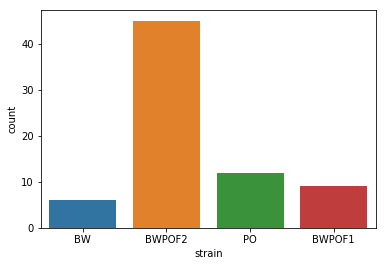

In [35]:
import seaborn as sns
sns.countplot(mice['strain'],label="Count")
plt.show()

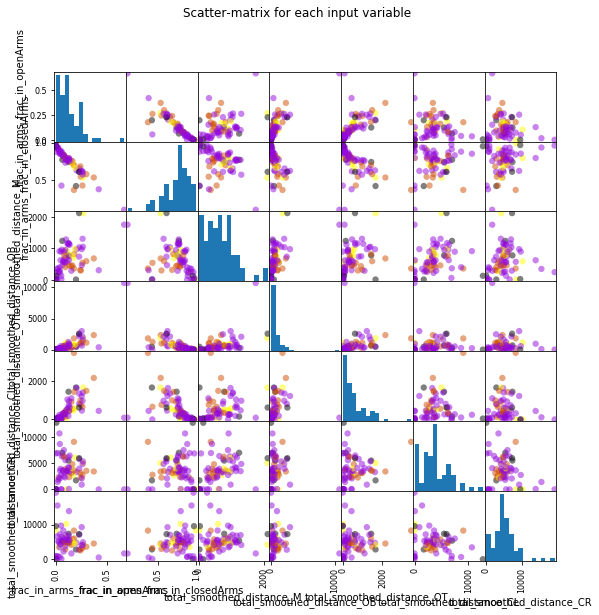

In [36]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

# feature_names = ['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms']
feature_names = ['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms',
                "total_smoothed_distance_M", "total_smoothed_distance_OB", "total_smoothed_distance_OT", 
                 "total_smoothed_distance_CL", "total_smoothed_distance_CR"]
X = mice[feature_names]
y = mice['strain']
y_chart = pd.factorize(mice['strain'])[0]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y_chart, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.show()

### Modeling

In [37]:
# feature_names = ['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms']
feature_names = ['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms',
                "total_smoothed_distance_M", "total_smoothed_distance_OB", "total_smoothed_distance_OT", 
                 "total_smoothed_distance_CL", "total_smoothed_distance_CR"]


X = mice[feature_names]
y = mice['strain']
print(X.shape)
print(y.shape)

(72, 7)
(72,)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_reg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.61
Accuracy of Logistic regression classifier on test set: 0.72


In [40]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(decision_tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(decision_tree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


In [41]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.69
Accuracy of KNN classifier on test set: 0.67


In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = log_reg.predict(X_test)
print("Logistic Regression")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Logistic Regression
[[ 0  1  0]
 [ 0 13  0]
 [ 0  4  0]]
              precision    recall  f1-score   support

          BW       0.00      0.00      0.00         1
      BWPOF2       0.72      1.00      0.84        13
          PO       0.00      0.00      0.00         4

   micro avg       0.72      0.72      0.72        18
   macro avg       0.24      0.33      0.28        18
weighted avg       0.52      0.72      0.61        18



/anaconda3/envs/capstone/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/capstone/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/capstone/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
